# Анализ международного сервиса по продаже и аренде жилой недвижимости **Alyona Ivanovna Real Estate Agency**

#### На данном этапе работы нам необходимо проанализировать предоставленные данные из файла **data.csv**, чтобы понять как с ними рабоать.

##### Импортируем необходимые для анализа библиотеки и читаем данные

In [357]:
import re
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import requests
path = "./datasets/_data.csv"
rent = pd.read_csv(path)
print (rent.columns)
rent

Index(['Unnamed: 0', 'ID  объявления', 'Количество комнат', 'Тип', 'Метро',
       'Адрес', 'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны',
       'Описание', 'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод',
       'Ссылка на объявление'],
      dtype='object')


,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",...,NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
23364,23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",...,Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
23365,23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",...,На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
23366,23366,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",...,Во двор,"Совмещенный (1), Раздельный (1)",NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525


##### Удаляем столбцы, которые нам не понадобятся для анализа.


In [358]:
rent = rent.drop(labels =['Unnamed: 0','Тип','Телефоны','Ссылка на объявление','Серия дома','Описание'], axis= 1)
rent.columns

Index(['ID  объявления', 'Количество комнат', 'Метро', 'Адрес', 'Площадь, м2',
       'Дом', 'Парковка', 'Цена', 'Ремонт', 'Площадь комнат, м2', 'Балкон',
       'Окна', 'Санузел', 'Можно с детьми/животными', 'Дополнительно',
       'Название ЖК', 'Высота потолков, м', 'Лифт', 'Мусоропровод'],
      dtype='object')

#### **Адрес**
##### Проверяем из каких городов наши объявления.


In [359]:
cities = rent['Адрес'].apply(lambda x: x.split(',')[0])
cities.unique()

array(['Москва', 'Санкт-Петербург', 'Краснодарский край'], dtype=object)

##### Удаляем строки с данными не из Москвы.


In [360]:
rent.drop(rent[rent['Адрес'].str.startswith('Санкт-Петербург')].index, inplace = True)
rent.drop(rent[rent['Адрес'].str.startswith('Краснодарский край')].index, inplace = True)
cities = rent['Адрес'].apply(lambda x: x.split(',')[0])
cities.unique()

array(['Москва'], dtype=object)

#### **Дом**
##### Выделяем в отдельные столбцы: этаж, этаж всего дома и тип дома.



In [361]:
def get_floor(row) :
    result = {}
    l = row['Дом'].split(',')
    if len(l) == 0 : return result
    floors = l[0].split('/')
    result['floor_flat'] = floors[0]
    result['floors_total']= floors[1]
    if len(l) > 1 :
        result['building_type'] = l[1][1:] # remove first space
    return result

floor_info = rent.apply(get_floor, axis=1, result_type='expand')
rent['floor_flat'] = floor_info['floor_flat'].astype('Int64')
rent['floors_total'] = floor_info['floors_total'].astype('Int64')
rent['building_type'] = floor_info['building_type']
rent = rent.drop(labels ='Дом', axis= 1)

print(floor_info['building_type'].unique())
print("Number of Nan in building_type: ", floor_info['building_type'].isna().sum())  # 2971 – Nan values
print("\nFlat floor vals:", sorted(floor_info['floor_flat'].unique()))    #range -1 to 85
print("\nTotal floors:", sorted(floor_info['floors_total'].unique()))  #range 1 to 116

['Монолитный' 'Монолитно-кирпичный' nan 'Панельный' 'Сталинский'
 'Кирпичный' 'старый фонд' 'Блочный' 'Деревянный' 'Щитовой']
Number of Nan in building_type:  2971

Flat floor vals: ['-1', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '45', '46', '47', '48', '49', '5', '50', '52', '53', '54', '55', '57', '58', '59', '6', '61', '65', '7', '70', '71', '75', '8', '85', '9']

Total floors: ['1', '10', '11', '116', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '57', '58', '59', '6', '60', '62', '65', '68', '7', '72', '73', '75', '76', '77', '78', '8', '80', '85', '86', '9', '95']


#### **Дополнительно**
##### Используем метод быстрого кодирования для подготовки файла к машинному обучению.


In [362]:

def get_equp(row) :
    result = {}
    if type(row['Дополнительно']) != str : return result
    l = row['Дополнительно'].split(',')
    if len(l) == 0 : return result
    for eq in l :
        if eq[0] == ' ' : eq = eq[1:]
        result[eq] = 1
    return result


additional = rent.apply(get_equp, axis=1, result_type='expand')
for c in additional.columns :
    additional[c] = additional[c].astype('Int64')
additional = additional.fillna(0)

rent['room_furniture'] = dict(zip(rent.index, additional['Мебель в комнатах']))
rent['kitchen_furniture'] = dict(zip(rent.index, additional['Мебель на кухне']))
rent['bath_tub'] = dict(zip(rent.index, additional['Ванна']))
rent['shower'] = dict(zip(rent.index, additional['Душевая кабина']))
rent['washing_machine'] = dict(zip(rent.index, additional['Стиральная машина']))
rent['conditioner'] = dict(zip(rent.index, additional['Кондиционер']))
rent['dishwasher'] = dict(zip(rent.index, additional['Посудомоечная машина']))
rent['tv'] = dict(zip(rent.index, additional['Телевизор']))
rent['fridge'] = dict(zip(rent.index, additional['Холодильник']))
rent['internet'] = dict(zip(rent.index, additional['Интернет']))
rent['phone'] = dict(zip(rent.index, additional['Телефон']))

rent = rent.drop(labels ='Дополнительно', axis= 1)


print(additional.columns)
rent.head(2)

Index(['Мебель в комнатах', 'Мебель на кухне', 'Ванна', 'Душевая кабина',
       'Стиральная машина', 'Кондиционер', 'Посудомоечная машина', 'Телевизор',
       'Холодильник', 'Интернет', 'Телефон'],
      dtype='object')


,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Парковка,Цена,Ремонт,"Площадь комнат, м2",Балкон,...,kitchen_furniture,bath_tub,shower,washing_machine,conditioner,dishwasher,tv,fridge,internet,phone
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,25 25 20 25,NaN,...,1,1,1,1,1,1,1,1,1,0


#### **Балкон**
##### Используем метод быстрого кодирования и разделяем на два столбца balcony и loggia.


In [363]:
# 'Балкон'
rent[['balcony', 'loggia']] = rent.Балкон.str.split(",", expand = True)
rent[['balcony', 'loggia']]
rent[['balcony', 'balconynew']] = rent.balcony.str.split(" ", expand = True)
rent.loc[rent['balcony'] == 'Лоджия', 'loggia'] = rent['balconynew']
rent.loc[rent['balcony'] == 'Балкон', 'balcony'] = rent['balconynew']
rent = rent.assign(balcony = lambda x: x['balcony'].str.extract('(\d+)'))
rent = rent.assign(loggia = lambda x: x['loggia'].str.extract('(\d+)'))
rent['balcony'] = rent['balcony'].fillna(0)
rent['loggia'] = rent['loggia'].fillna(0)
rent = rent.drop(['balconynew', 'Балкон'], axis=1)
rent = rent.astype({'balcony':'int'})
rent = rent.astype({'loggia':'int'})
print("Balcony: ", rent['balcony'].unique())
print("Loggia: ", rent['balcony'].unique())

Balcony:  [0 1 3 2 4]
Loggia:  [0 1 3 2 4]


#### **Санузел**
##### Преобразовываем данные в столбцы по типам санузлов и их количествам в квартирах.

In [364]:
# 'Санузел'
rent[['combined_bathroom', 'separate_bathroom']] = rent.Санузел.str.split(",", expand = True)
rent[['combined_bathroom', 'sfnew']] = rent.combined_bathroom.str.split(" ", expand = True)
rent.loc[rent['combined_bathroom'] == 'Раздельный', 'separate_bathroom'] = rent['sfnew']
rent.loc[rent['combined_bathroom'] == 'Совмещенный', 'combined_bathroom'] = rent['sfnew']
rent = rent.assign(combined_bathroom = lambda x: x['combined_bathroom'].str.extract('(\d+)'))
rent = rent.assign(separate_bathroom = lambda x: x['separate_bathroom'].str.extract('(\d+)'))
rent['combined_bathroom'] = rent['combined_bathroom'].fillna(0)
rent['separate_bathroom'] = rent['separate_bathroom'].fillna(0)
rent = rent.drop(['sfnew', 'Санузел'], axis=1)
rent = rent.astype({'combined_bathroom':'int'})
rent = rent.astype({'separate_bathroom':'int'})
rent['separate_bathroom'] = np.where((rent['separate_bathroom'] == 0) & (rent['building_type'].isnull() == True), 1, rent['separate_bathroom'])
rent['separate_bathroom'] = np.where((rent['separate_bathroom'] == 0) & (rent['building_type'] == 'Сталинский'), 1, rent['separate_bathroom'])
rent['combined_bathroom'] = np.where((rent['combined_bathroom'] == 0) & (rent['building_type'] == 'старый фонд'), 1, rent['combined_bathroom'])
#rent['bathroom'] = rent['sf1'] + rent['sf2']
#rent = rent.astype({'bathroom':'int'})
#rent.drop(['sf1', 'sf2'], axis=1)
#print("Bathroom: ", rent['balcony'].unique())

#### **Лифт**
##### Разделяем данные по типу лифта и их количеству в доме. Данные Nan заполняем на основе вспомогательных столбцов и строительным нормам по проектированию жилых домов в зависимости от количества этажей в доме и его типа.


In [365]:
# 'Лифт'
rent[['passenger_lift', 'service_lift']] = rent.Лифт.str.split(",", expand = True)
rent[['passenger_lift', 'passenger_liftnew']] = rent.passenger_lift.str.split(" ", expand = True)
rent.loc[rent['passenger_lift'] == 'Груз', 'service_lift'] = rent['passenger_liftnew']
rent.loc[rent['passenger_lift'] == 'Пасс', 'passenger_lift'] = rent['passenger_liftnew']
rent = rent.assign(passenger_lift = lambda x: x['passenger_lift'].str.extract('(\d+)'))
rent = rent.assign(service_lift = lambda x: x['service_lift'].str.extract('(\d+)'))
rent['passenger_lift'] = rent['passenger_lift'].fillna(0)
rent['service_lift'] = rent['service_lift'].fillna(0)
rent = rent.drop(['passenger_liftnew', 'Лифт'], axis=1)
rent = rent.astype({'passenger_lift':'int'})
rent = rent.astype({'service_lift':'int'})

print("passenger_lift: ", rent['passenger_lift'].unique())
print("service_lift: ", rent['service_lift'].unique())

passenger_lift:  [ 4  1  0  3  2  5 60  6  8  7 50]
service_lift:  [ 1  0  2  3  4 12  8  6]


#### **Площадь, м2**
##### Для дальнейшего анализа берем только общую площадь квартиры (первое число в данных колонки), так как неизвестно что обозначают остальные числа. Преобразоваем тип данных столбца во float и переименовываем колонку в **square_total**

In [366]:
rent['Площадь, м2'] = rent['Площадь, м2'].str.split(pat='/', n = 1, expand = True)[0].astype('float')
rent.rename(columns = {'Площадь, м2':'square_total'}, inplace = True)
rent[0:2]

,ID объявления,Количество комнат,Метро,Адрес,square_total,Парковка,Цена,Ремонт,"Площадь комнат, м2",Окна,...,tv,fridge,internet,phone,balcony,loggia,combined_bathroom,separate_bathroom,passenger_lift,service_lift
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,NaN,...,1,1,1,1,0,0,0,0,4,1
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,25 25 20 25,На улицу и двор,...,1,1,1,0,0,0,2,1,1,1


#### **Парковка**
##### Заменяем значения NaN на ‘Нет парковки’, так как в приведенных данных есть информация о наличии парковки, значит вариант с NaN является ее отсутствием.



In [367]:
rent['Парковка'] = rent['Парковка'].fillna('нет парковки')
rent.rename(columns = {'Парковка':'parking'}, inplace = True)
rent[0:2]

,ID объявления,Количество комнат,Метро,Адрес,square_total,parking,Цена,Ремонт,"Площадь комнат, м2",Окна,...,tv,fridge,internet,phone,balcony,loggia,combined_bathroom,separate_bathroom,passenger_lift,service_lift
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,NaN,...,1,1,1,1,0,0,0,0,4,1
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,25 25 20 25,На улицу и двор,...,1,1,1,0,0,0,2,1,1,1


#### **Цена**
##### Из данного столбца выделяем дополнительные колонки с информацией: Плата за месяц, Объем залога, Включены ли коммунальные услуги, Срок аренды, Предоплата (кол-во месяцев)


In [368]:
def ruble_value(x ) :
    if type(x) != str : return nan
    if x.endswith('$') :
        return float(x.split()[0]) * 80
    elif x.endswith('€') :
        return float(x.split()[0]) * 90
    elif x.endswith('руб.') :
        return float(x.split()[0])
    return nan

def process_price(row) :
    result = {}
    if type(row['Цена']) != str : return result
    pairs = row['Цена'].split(',')
    if len(pairs) == 0 : return result

    # pairs – длина может быть 2, 3, 4, 5, 6

    for next in pairs :
        if 'За месяц' in next  :
            # Возможные форматы:
            # 500000.0 руб./ За месяц
            # 10000.0 $/ За месяц
            # 9800.0 €/ За месяц
            price_str = next.split('/')
            result['price_rub'] = ruble_value(price_str[0])
        else :
            if next[0] == ' ' :
                next = next[1:]
                
            # Возможные форматы:
            # Коммунальные услуги включены
            # 'Залог'- 500000 руб.
            # 'Срок аренды - [nan, 'Длительный', 'На несколько месяцев']
            # 'Сумма коммунальных платежей' - 500000 руб.
 
            if next == 'Коммунальные услуги включены' :
                if ('utilities' in result) == False :
                    result['utilities'] = 0

            elif next.startswith('Сумма коммунальных платежей') :
                utilities = next.split(" - ")[1]
                if 'utilities' in result :
                    print("Both util: ", pairs)
                result['utilities'] = ruble_value(utilities)

            elif next.startswith('Срок аренды') :
                rental_period = next.split(" - ")[1]
                result['rental_period'] = rental_period

            elif next.startswith('Залог') :
                advance = next.split(" - ")[1]
                if 'advance' in result :
                    print("Both adv1: ", pairs) 
                result['advance'] = ruble_value(advance)
            
            elif next.startswith('Предоплата') :
                advance = int(next.split()[1]) * result['price_rub']
                if (('advance' in result) == False) or advance > result['advance'] :
                    result['advance'] = advance
     

    return result
price = rent.apply(process_price, axis=1, result_type='expand')
rent['price_rub_month'] = price['price_rub'].astype('Int64')
rent['advance'] = price['advance'].astype('Int64')
rent['utilities'] = price['utilities'].astype('Int64')

print("\nMin price in rub per month:", rent['price_rub_month'].unique().min())
print("Max price in rub per month:", rent['price_rub_month'].unique().max())

# ЧТО ИЗ price кроме цены нужно включать???

# Длительный  price_rub        271
# На несколько месяцев  price_rub        1
# print("\nКол: Срок аренды - Длительный ",
#       price[price['rental_period'] == 'Длительный'].count())
# print("Кол: Срок аренды - На несколько месяцев ",
#       price[price['rental_period'] == 'На несколько месяцев'].count())

# # Залог price_rub        820
# print("Кол: Залог",
#       price[price['advance'].isna()].count())

print("\nMin advance in rub per month:", price['advance'].unique().min())
print("Max advance in rub per month:", price['advance'].unique().max())

print("\nMin utilities in rub per month:", price['utilities'].unique().min())
print("Max utilities in rub per month:", price['utilities'].unique().max())

price


Min price in rub per month: 12000
Max price in rub per month: 3000000

Min advance in rub per month: nan
Max advance in rub per month: nan

Min utilities in rub per month: nan
Max utilities in rub per month: nan


,price_rub,advance,utilities,rental_period
0,500000.0,500000.0,0.0,Длительный
1,500000.0,500000.0,0.0,Длительный
2,500000.0,500000.0,NaN,Длительный
3,400000.0,400000.0,NaN,Длительный
4,225000.0,225000.0,0.0,Длительный
...,...,...,...,...
23363,42000.0,42000.0,0.0,Длительный
23364,45000.0,45000.0,0.0,Длительный
23365,50000.0,50000.0,0.0,Длительный
23366,55000.0,110000.0,0.0,Длительный


#### **Ремонт**
##### Данные NaN заполняем значениями “Без ремонта”, так как пропущено всего 2 755 значений, а это всего 11%.

In [369]:
rent['Ремонт'] = rent['Ремонт'].fillna('Без ремонта')
rent.rename(columns = {'Ремонт':'renovation'}, inplace = True)
rent[0:2]

,ID объявления,Количество комнат,Метро,Адрес,square_total,parking,Цена,renovation,"Площадь комнат, м2",Окна,...,phone,balcony,loggia,combined_bathroom,separate_bathroom,passenger_lift,service_lift,price_rub_month,advance,utilities
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,NaN,...,1,0,0,0,0,4,1,500000,500000,0
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,25 25 20 25,На улицу и двор,...,0,0,0,2,1,1,1,500000,500000,0


#### **Окна**
##### Так как невозможно определить на какую сторону выходят окна у квартиры, то значения NaN мы заполняем как ‘Нет данных”.


In [370]:
rent['Окна'] = rent['Окна'].fillna('Нет данных')
rent.rename(columns = {'Окна':'windows'}, inplace = True)
rent[0:2]

,ID объявления,Количество комнат,Метро,Адрес,square_total,parking,Цена,renovation,"Площадь комнат, м2",windows,...,phone,balcony,loggia,combined_bathroom,separate_bathroom,passenger_lift,service_lift,price_rub_month,advance,utilities
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,Нет данных,...,1,0,0,0,0,4,1,500000,500000,0
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,25 25 20 25,На улицу и двор,...,0,0,0,2,1,1,1,500000,500000,0


#### **Можно с детьми/животными**
##### Создаем столбцы pets_allowed и kids_allowed и проставляем значени 1 или 0 в зависимости от условий проживания. NaN значения будут равняться 0 в двух столбцах.


In [371]:
def get_allowed(row) :
    result = {}
    if type(row['Можно с детьми/животными']) != str : return result
    l = row['Можно с детьми/животными'].split(',')
    if len(l) == 0 : return result
    for al in l :
        if al[0] == ' ' : al = al[1:]
        result[al] = 1
    return result
allowed = rent.apply(get_allowed, axis=1, result_type='expand')
for c in allowed.columns :
    allowed[c] = allowed[c].astype('Int64')
allowed = allowed.fillna(0)
rent[['kids_allowed','pets_allowed']] = allowed
rent.drop('Можно с детьми/животными', axis=1, inplace=True)
rent[0:2]

,ID объявления,Количество комнат,Метро,Адрес,square_total,parking,Цена,renovation,"Площадь комнат, м2",windows,...,loggia,combined_bathroom,separate_bathroom,passenger_lift,service_lift,price_rub_month,advance,utilities,kids_allowed,pets_allowed
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,Нет данных,...,0,0,0,4,1,500000,500000,0,1,1
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,25 25 20 25,На улицу и двор,...,0,2,1,1,1,500000,500000,0,1,0


#### **Мусоропровод**
##### Значения NaN заполняем как "Нет"


In [372]:
rent['Мусоропровод'] = rent['Мусоропровод'].fillna('Нет')
rent.rename(columns = {'Мусоропровод':'garbage_chute'}, inplace = True)
rent['garbage_chute'] = rent['garbage_chute'].apply(lambda i: 1 if i == 'Да' else 0)

#### **Метро**
#### На основе станций метро и данных по округам и районам Москвы выделяем несколько новых колонок: станция метро, расстояние до метро, на чем добираться до метро, округ и район.

In [373]:
#Разбиваю столбец Метро на Станцию Метро и Расстояние
rent['Станция Метро'] = rent['Метро'].str.split('(').str[0]
rent['Расстояние от метро'] = rent['Метро'].str.split('(').str[1]
rent['Расстояние от метро'] = rent['Расстояние от метро'].str[:-1]
rent['Станция Метро']=rent['Станция Метро'].str[3:-1]
rent = rent.drop(labels ='Метро', axis= 1)

In [374]:
#Добавляю в rent информацию по округам подтянутую из базы по станциям метро
metro = pd.read_json('datasets/metro.msk.json')
metro2 = metro['stations'].apply(pd.Series)
metro_metro = pd.DataFrame()
x = 0
while x < len(metro2.index):
    metro_metro = pd.concat([metro_metro, metro2.loc[x].apply(pd.Series)], ignore_index=True)
    x += 1
metro_metro= metro_metro.dropna(how='all')
metro_metro = metro_metro.drop_duplicates(subset=['name'])
metro_metro = metro_metro.rename(columns={'name': 'Станция Метро'})
metro_metro = metro_metro.rename(columns={'admArea': 'Округ'})
metro_okrug = metro_metro[['Станция Метро', 'Округ']]
#по итогам сборки базы оказалось большое количество пустых ячеек Округ из-за давности используемой базы. была выполнена сортировка по незаполненным станциям метро и создана база вручную по новым станциям из открытых источников, чтобы избежать пустых значений
more_okrugs = {
    'Станция Метро': ['Некрасовка','Беломорская', 'Солнцево', 'Новаторская','Марьина роща','Зюзино','Окская','Озерная','Давыдково','Новопеределкино','Юго-Восточная','Говорово','Соколиная гора','Бескудниково','Народное ополчение','Петровский Парк','Стахановская','Гражданская','Покровское','Аминьевская','Лухмановская','Лианозово','Новодачная','Парк Культуры','Марк','улица Народного ополчения','Рабочий поселок','Перерва','Лефортово','Мичуринский проспект','Боровское шоссе','Красный Балтиец','Дегунино','Улица Дмитриевского','Красный Строитель','Сетунь','Москворечье','Калитники','Депо','Щербинка','Тестовская','Курьяново','Покровское-Стрешнево','Долгопрудная','Верхние котлы','Рассказовка','Павшино','Трикотажная','Кубанская','Москва-Товарная','Воронцовская','Бутово','Косино','Пенягино','Библиотека им. Ленина','Битца','Сколково','Битцевский парк','Немчиновка','Каланчёвская','Мневники','Нахабино','Яхромская'],
    'Округ': ['Юго-Восточный административный округ', 'Северный административный округ', 'Западный административный округ','Западный административный округ','Северо-Восточный административный округ','Юго-Западный административный округ','Юго-Восточный административный округ','Западный административный округ','Западный административный округ','Западный административный округ','Юго-Восточный административный округ','Новомосковский административный округ','Восточный административный округ','Северный административный округ','Северо-Западный административный округ','Северный административный округ','Юго-Восточный административный округ','Северный административный округ','Северо-Западный административный округ', 'Западный административный округ','Восточный административный округ','Северо-Восточный административный округ','Северо-Восточный административный округ','Центральный административный округ','Северный административный округ','Северо-Западный административный округ','Западный административный округ','Юго-Восточный административный округ','Юго-Восточный административный округ','Западный административный округ','Западный административный округ','Московская область','Северный административный округ','Восточный административный округ','Южный административный округ','Западный административный округ','Южный административный округ','Центральный административный округ','Центральный административный округ','Новомосковский административный округ','Центральный административный округ','Юго-Восточный административный округ','Северо-Западный административный округ','Северный административный округ','Юго-Западный административный округ','Новомосковский административный округ','Московская область','Северо-Западный административный округ','Юго-Восточный административный округ','Центральный административный округ','Центральный административный округ','Юго-Западный административный округ','Восточный административный округ','Северо-Западный административный округ','Центральный административный округ','Московская область','Западный административный округ','Юго-Западный административный округ','Московская область','Московская область','Северо-Западный административный округ','Московская область', 'Северный административный округ']
}
more_okrugsdf = pd.DataFrame(data=more_okrugs)
metro_okrug = pd.concat([metro_okrug, more_okrugsdf], ignore_index=True)
rent = pd.merge(rent, metro_okrug, on='Станция Метро', how='left')

In [375]:
#Вынуждены были принять решение дропнуть объявления, где собственник не указал метро. Нам очень важны территориальные данные для анализа и быстрого способа их проставить найти не удалось. 
#Речь о 346 записях из 19 с лишним тысяч. 
#Однако в будущем, это проблема может быть решена не только прописыванием данных вручную, опираясь на адрес.
#Для большого количества показателей территориальные данные важны не столько, как численное выражение округа. 
#И возможно, его категоризация по другим значениям, таким как цена, сможет решить проблему пропущенных данных без большого ущерба для общей базы.
rent = rent[rent['Станция Метро'].notna()]

##### **Пешая доступность** = availibility

In [376]:
#Добавляем столбец availibility означающий шаговую доступность
rent['Расстояние от метро'] = rent['Расстояние от метро'].str[-6:]
rent['availibility'] = np.where(rent['Расстояние от метро'] == 'пешком', 1, 0)
rent = rent.drop(labels ='Расстояние от метро', axis= 1)

In [377]:
rent.groupby('availibility', as_index=False).agg({'ID  объявления': 'count'})

,availibility,ID объявления
0,0,2033
1,1,17358


#### **Количество комнат**
##### Выделяем количество комнат в формате int, отделяем тип комнат в новую колонку. Значения NaN подтягиваем с помощью колонки 'Площадь комнат, м2', где можно узнать количество комнат по разделителю.

In [378]:
#Делю столбец количество комнат на два
rent['Число комнат'] = rent['Количество комнат'].str.split(',').str[0]
rent['Число комнат'] = pd.to_numeric(rent['Число комнат'])
rent['Тип комнат'] = rent['Количество комнат'].str.split(',').str[1]
rent = rent.drop(labels ='Количество комнат', axis= 1)

In [379]:
#Заполняем пропущенные значения числа комнат исходя из площади
def number_of_rooms(x):
    if x<35:
             return 1
    if x>= 35 and x<65:
             return 2
    if x>65:
             return 3

rent['Число комнат']=rent['Число комнат'].fillna(rent['square_total'].apply(lambda x: number_of_rooms(x)))
rent = rent.astype({'Число комнат': int})

In [380]:
#Заменяем пустые значения планировки на - нет данных. Их слишком много, чтобы приравнивать к чему-то
rent['Тип комнат'] = rent['Тип комнат'].fillna('Нет данных')

In [381]:
rent.columns



Index(['ID  объявления', 'Адрес', 'square_total', 'parking', 'Цена',
       'renovation', 'Площадь комнат, м2', 'windows', 'Название ЖК',
       'Высота потолков, м', 'garbage_chute', 'floor_flat', 'floors_total',
       'building_type', 'room_furniture', 'kitchen_furniture', 'bath_tub',
       'shower', 'washing_machine', 'conditioner', 'dishwasher', 'tv',
       'fridge', 'internet', 'phone', 'balcony', 'loggia', 'combined_bathroom',
       'separate_bathroom', 'passenger_lift', 'service_lift',
       'price_rub_month', 'advance', 'utilities', 'kids_allowed',
       'pets_allowed', 'Станция Метро', 'Округ', 'availibility',
       'Число комнат', 'Тип комнат'],
      dtype='object')

In [382]:
rent = rent.drop(labels =['Адрес','Цена','Площадь комнат, м2','Название ЖК','building_type'], axis= 1)
rent.rename(columns = {'Ремонт':'renovation','ID  объявления':'id_ad',
'Высота потолков, м':'ceiling_height','Станция Метро':'metro','Округ':'district',
'Число комнат':'rooms', 'Тип комнат':'room_type'}, inplace = True)

In [383]:
rent.columns

Index(['id_ad', 'square_total', 'parking', 'renovation', 'windows',
       'ceiling_height', 'garbage_chute', 'floor_flat', 'floors_total',
       'room_furniture', 'kitchen_furniture', 'bath_tub', 'shower',
       'washing_machine', 'conditioner', 'dishwasher', 'tv', 'fridge',
       'internet', 'phone', 'balcony', 'loggia', 'combined_bathroom',
       'separate_bathroom', 'passenger_lift', 'service_lift',
       'price_rub_month', 'advance', 'utilities', 'kids_allowed',
       'pets_allowed', 'metro', 'district', 'availibility', 'rooms',
       'room_type'],
      dtype='object')

In [384]:
#Заменяем пустые значения в высоте потолков средними значениями по выборке
rent['ceiling_height'] = rent['ceiling_height'].fillna(rent['ceiling_height'].mean())

In [385]:
rent['utilities'] = rent['utilities'].fillna(0)
rent['advance'] = rent['advance'].fillna(0)

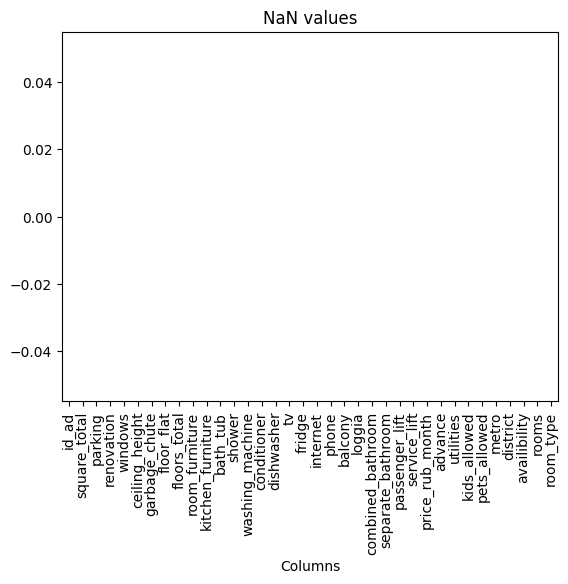

In [386]:
nan = rent.isna().sum()
nan.plot(kind='bar')
plt.title('NaN values')
plt.xlabel('Columns')
plt.show()

In [388]:
rent.to_csv('./datasets/_data_fixed.csv', index = False)

In [389]:
import category_encoders as ce

In [390]:
tenc = ce.TargetEncoder()
rent_okrug = tenc.fit_transform(rent['district'], rent['square_total'])
rent_okrug_new = rent_okrug.join(rent.drop('district', axis=1))
rent_okrug_new

,district,id_ad,square_total,parking,renovation,windows,ceiling_height,garbage_chute,floor_flat,floors_total,...,service_lift,price_rub_month,advance,utilities,kids_allowed,pets_allowed,metro,availibility,rooms,room_type
0,106.527467,271271157,200.0,подземная,Дизайнерский,Нет данных,3.000000,1,5,16,...,1,500000,500000,0,1,1,Смоленская,1,4,Нет данных
1,106.527467,271634126,198.0,подземная,Дизайнерский,На улицу и двор,3.500000,0,5,16,...,1,500000,500000,0,1,0,Смоленская,1,4,Нет данных
2,106.527467,271173086,200.0,подземная,Евроремонт,На улицу и двор,3.200000,0,5,16,...,0,500000,500000,0,1,0,Смоленская,1,4,Оба варианта
3,106.527467,272197456,170.0,подземная,Евроремонт,На улицу и двор,3.200000,0,5,6,...,0,400000,400000,0,0,1,Смоленская,1,4,Оба варианта
4,106.527467,273614615,58.0,нет парковки,Евроремонт,На улицу и двор,3.900000,1,12,26,...,1,225000,225000,0,0,0,Арбатская,1,2,Нет данных
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19732,53.150206,215565511,35.0,нет парковки,Евроремонт,Нет данных,2.997698,0,10,14,...,1,42000,42000,0,0,0,Говорово,1,2,Нет данных
19733,77.084655,274654844,38.7,нет парковки,Евроремонт,Во двор,2.997698,0,5,18,...,1,45000,45000,0,0,0,Солнцево,1,1,Нет данных
19734,77.084655,268679909,43.1,нет парковки,Дизайнерский,На улицу и двор,2.997698,0,5,5,...,0,50000,50000,0,1,0,Солнцево,1,2,Оба варианта
19735,77.084655,274807525,52.5,наземная,Евроремонт,Во двор,2.650000,1,8,23,...,0,55000,110000,0,0,0,Солнцево,1,2,Нет данных


In [392]:
rent_okrug_new.to_csv('./datasets/data.csv', index = False)